In [2]:
import pyaurorax
import datetime
import numpy as np
import matplotlib.pyplot as plt
import cartopy

aurorax = pyaurorax.PyAuroraX()

In [3]:
# Download a single one-minute grid file 
dataset = "TREX_RGB_GRID_MOSV001"
start_dt = datetime.datetime(2023, 3, 24, 8, 10, 0)
end_dt = datetime.datetime(2023, 3, 24, 8, 10, 0)
download_obj = aurorax.data.ucalgary.download(dataset, start_dt, end_dt)

In [5]:
# Read the grid file
data = aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames)

data.pretty_print()

Data:
  data                  : GridData(grid=array(dims=(512, 1024, 3, 20), dtype=float32), fill_value=-999, source_info=GridSourceInfoData(...)
  timestamp             : [20 datetimes]
  metadata              : [20 dictionaries]
  problematic_files     : []
  calibrated_data       : None
  dataset               : Dataset(name=TREX_RGB_GRID_MOSV001, short_description='TREx RGB All Sky Ima...)


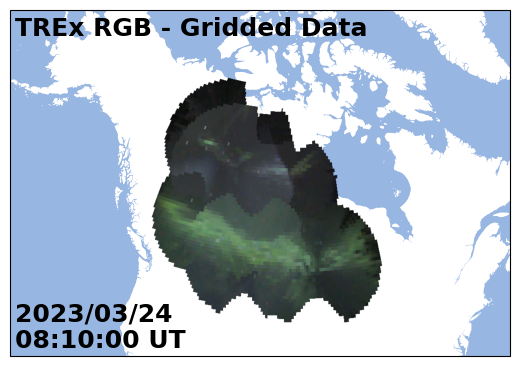

In [6]:
# TURN THE IMAGE INTO RGBA FOR TRANSPARENCY
image = data.data.grid[:, :, :, 0]
image = np.where(image == data.data.fill_value, np.nan, image)
normalized_image = np.nan_to_num(image / np.nanmax(image), nan=0.0)
alpha_channel = np.where(np.isnan(image).any(axis=-1), 0.0, 1.0)
frame = np.dstack((normalized_image, alpha_channel))

# CREATE THE MAP
projection = cartopy.crs.NearsidePerspective(central_longitude=-100, central_latitude=55)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes((0, 0, 1, 1), projection=projection)
ax.set_extent([-140, -70, 35, 75], crs=cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)

# PLOT GRID DATA
plt.imshow(frame, extent=(-180, 180, -90, 90), transform=cartopy.crs.PlateCarree(), origin='lower')
plt.text(0.01, 0.925, "TREx RGB - Gridded Data", transform=ax.transAxes, fontsize=18, weight='bold')
plt.text(0.01, 0.100, "2023/03/24", transform=ax.transAxes, fontsize=18, weight='bold')
plt.text(0.01, 0.025, "08:10:00 UT", transform=ax.transAxes, fontsize=18, weight='bold')
plt.show()